# A least-squares fitting execise in gas chromatography.

The csv file `nm2023/data/exp_data.csv` contains data from a gas chromatography experiment. The first column corresponds to the flow rate, $u$, in milli-Litre-per-minute (mL/min), and the second column corresponds to the plate height, $H(u)$, in millimeter (mm). 

Fit this data to the [van Deemter equation](https://en.wikipedia.org/wiki/Van_Deemter_equation), $H(u)=A+B/u+Cu$, and determine the diffusion parameters, $A$, $B$, and $C$. The meaning of the parameters are defined in the wiki article linked above. 

Report the following in a Jupyter notebook (rename this file as `ClassProject_vanDeemter_23Feb2023_githubhandle.ipynb`) and send it via google classroom:   
- The diffusion parameters, $A$, $B$, and $C$  
- Accuracy of your fit in terms of mean absolute deviation (MAD), root mean square deviation (RMSD), maximum absolute error (MAD), and Pearson correlation coefficient. 
- Plot the actual data along with your fitted function.


# Solution

## Codes

In [75]:
import numpy as np

#=== Read the data from a file
file=open('../data/exp_data.csv','r')

x=np.array([])
y=np.array([])

iline=0
for line in file:
    if iline > 0:            # i == 0 corresponds to the heading
        str=line.split(',')
        valx=eval(str[0])
        valy=eval(str[1])
        x=np.append(x,[valx])
        y=np.append(y,[valy])
        
    iline=iline+1
myfile.close() 
D=3 #D=1 shows a linear trend, unlike what is expected, however D=2(parabola) the expected sharper increase in H at higher u is not seen
N=x.shape[0]

a=np.polyfit(x,y,D)
for i in range(D+1):
    print("coefficient of x^",i," is ",a[i])
    
p = np.poly1d(a)#fitted polynomial

yfit=np.polyval(a,x)

mad = np.mean(np.abs(y-yfit)) #MAD
rmsd = np.sqrt(((y - yfit) ** 2).mean()) #RMSD
pearson_coef = np.corrcoef(y, yfit)[0,1]  #pearson corelation coefficient

mae= np.max(np.abs(y-yfit))

print("Mean absolute deviation=",mad)
print("Root Mean square deviation=",rmsd)
print("pearson corelation coefficient=", pearson_coef)
print("max absolute error=",mae)


coefficient of x^ 0  is  -1.3322932475488948e-05
coefficient of x^ 1  is  0.0034801903821114017
coefficient of x^ 2  is  -0.2439304418422671
coefficient of x^ 3  is  9.899137969187736
Mean absolute deviation= 0.8906893527010213
Root Mean square deviation= 1.2564321043487143
pearson corelation coefficient= 0.6963326834514708
max absolute error= 4.634590265585411


## Plot

Text(0.5, 1.0, 'Polynomial fitting')

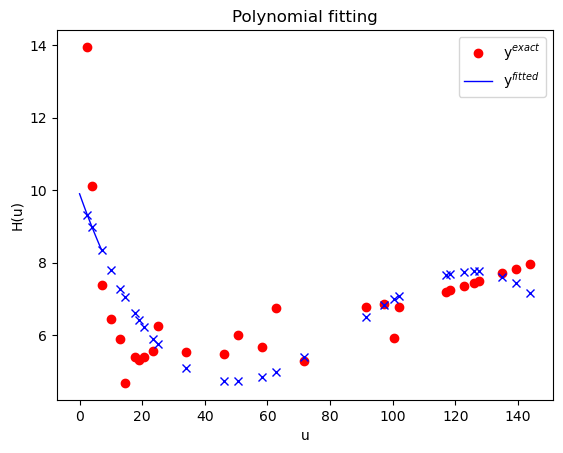

In [70]:
# Plot here
import numpy as np
import matplotlib.pyplot as plt

plt.plot(x,y,'o',color='r',linewidth=1,label='y$^{exact}$')
plt.plot(x,yfit,'x',color='b',linewidth=1)

xgrids=np.linspace(0,7, 51)
ygridsfit=np.polyval(a,xgrids)

plt.plot(xgrids,ygridsfit,'-',color='b',linewidth=1,label='y$^{fitted}$')

plt.legend()

plt.xlabel("u")
plt.ylabel("H(u)")
plt.title('Polynomial fitting')


## Accuracy of the fit

| A       | B       | C       | MAD     | RMSD    | Pearson coefficient |
|---------|---------|---------|---------|---------|---------------------|
| xx.xxxx | xx.xxxx | xx.xxxx | xx.xxxx | xx.xxxx | xx.xxxx             |